# Linear Algebra Python으로 직관력 기르기! - 심화편

In [1]:
# 기본 라이브러리들 호출
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# Notebook에 출력되는 그림 화질 설정 (높을수록 좋아짐)
mpl.rcParams['figure.dpi']= 100
# Notebook에 한글이 깨지지 않도록 폰트 지정 (에러 나시면 지우거나 폰트를 바꾸세요)
plt.rcParams["font.family"] = 'NanumGothic'

# Step 1: 데이터 가져오기
* 이번 강의에 사용될 데이터는 동물 관련 데이터입니다.
* 28가지 동물들의 두뇌 크기와 몸무게를 비교한 데이터입니다.
* 데이터 출처: https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/Animals.html

In [2]:
# pandas로 csv파일을 읽어서 dataframe을 만듭니다.
df = pd.read_csv('Animals.csv') 
df

,body,brain
0,1.350,8.1
1,465.000,423.0
2,36.330,119.5
3,27.660,115.0
4,1.040,5.5
5,11700.000,50.0
6,2547.000,4603.0
7,187.100,419.0
8,521.000,655.0
9,10.000,115.0


# Step 2: Plot으로 데이터 파악하기

Text(0.5, 1.0, '동물들의 몸무게 vs 두뇌 무게')

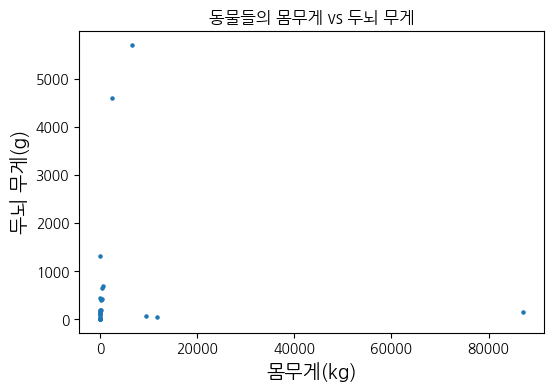

In [3]:
plt.scatter(df.body, df.brain,s=5)
plt.xlabel('몸무게(kg)', fontsize=14)
plt.ylabel('두뇌 무게(g)',fontsize=14)
plt.title('동물들의 몸무게 vs 두뇌 무게')
# 데이터들이 대부분 좌측 하단에 뭉쳐 있어 보입니다.

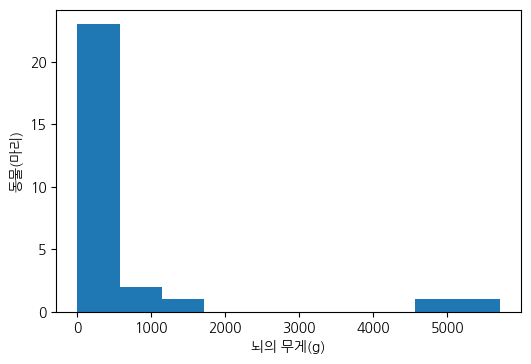

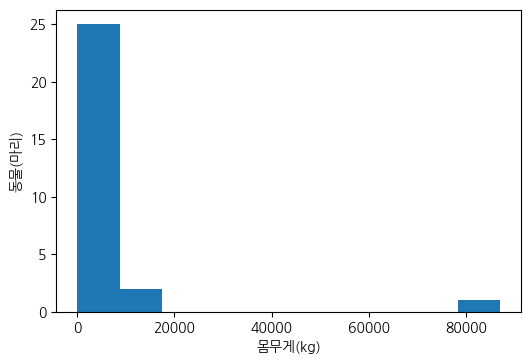

In [33]:
# 히스토그램으로 한번 분포를 파악해봅시다.
# brain 분포
plt.hist(df.brain)
plt.xlabel('뇌의 무게(g)')
plt.ylabel('동물(마리)')
plt.show() #show를 써줘야 한 개의 셀 안에 여러개의 그래프 출력이 됩니다.
# body 분포
plt.hist(df.body)
plt.xlabel('몸무게(kg)')
plt.ylabel('동물(마리)')
plt.show()
# 두 그래프 모두 심각하게 Right Skewed 되어있습니다.

# Step 3: Scikit-Learn을 이용해서 모델 트레이닝!

In [4]:
# Scikit-Learn(싸이킷 런)에서 선형 회귀 라이브러리를 불러옵니다.
# 문서 참고: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression 

In [79]:
# LinearRegression.fit(x,y)는 x와 y에 대해 선형 회귀를 해서 클래스를 출력합니다.
reg = LinearRegression().fit(df.body, df.brain)
# 해당 셀을 실행시키면 에러가 납니다.
# 문구는 "Reshape your data either using array.reshape(-1, 1)"라고 나옵니다.

ValueError: Expected 2D array, got 1D array instead:
array=[1.350e+00 4.650e+02 3.633e+01 2.766e+01 1.040e+00 1.170e+04 2.547e+03
 1.871e+02 5.210e+02 1.000e+01 3.300e+00 5.290e+02 2.070e+02 6.200e+01
 6.654e+03 9.400e+03 6.800e+00 3.500e+01 1.200e-01 2.300e-02 2.500e+00
 5.550e+01 1.000e+02 5.216e+01 2.800e-01 8.700e+04 1.220e-01 1.920e+02].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [6]:
# 에러를 해결하려면 df.body행의 형태를 바꾸어 주어야 합니다.
reg = LinearRegression().fit(df.body.values.reshape(-1,1), df.brain)

In [7]:
# 이 이유에 대해 설명해드리겠습니다.

# 싸이킷 런의 모델을 트레이닝 시킬 때 혹은 회귀 시킬 때, y는 상관 없지만
# x는 꼭 2차원 행렬이어야만 합니다.

# 하지만!!! df.body는 pandas의 Series 오브젝트 타입이고 Series 오브젝트는
# 오로지 list만을 표현하며 이는 1차원 행렬입니다.
# 이 Series오브젝트를 numpy오브젝트로 바꾸어 주어야 reshape를 통해
# df.body를 2차원 행렬로 바꿀 수 있습니다.
print('1. df.body는 Series 타입입니다:')
print(type(df.body))
print('2. df.body.values는 df.body를 1차원 행렬 numpy타입으로 바꿉니다:')
print(type(df.body.values))
print('3. 이제 reshape(-1,1)을 통해 df.body.values를 2차원 행렬로 바꿉니다:')
print(df.body.values.reshape(-1,1))
print('4. 1차원 행렬은 대괄호가 좌우로 한 개씩 있습니다. 3번처럼 대괄호가 두 개씩 있어야 합니다.')
print(df.body.values)

1. df.body는 Series 타입입니다:
<class 'pandas.core.series.Series'>
2. df.body.values는 df.body를 1차원 행렬 numpy타입으로 바꿉니다:
<class 'numpy.ndarray'>
3. 이제 reshape(-1,1)을 통해 df.body.values를 2차원 행렬로 바꿉니다:
[[1.350e+00]
 [4.650e+02]
 [3.633e+01]
 [2.766e+01]
 [1.040e+00]
 [1.170e+04]
 [2.547e+03]
 [1.871e+02]
 [5.210e+02]
 [1.000e+01]
 [3.300e+00]
 [5.290e+02]
 [2.070e+02]
 [6.200e+01]
 [6.654e+03]
 [9.400e+03]
 [6.800e+00]
 [3.500e+01]
 [1.200e-01]
 [2.300e-02]
 [2.500e+00]
 [5.550e+01]
 [1.000e+02]
 [5.216e+01]
 [2.800e-01]
 [8.700e+04]
 [1.220e-01]
 [1.920e+02]]
4. 1차원 행렬은 대괄호가 좌우로 한 개씩 있습니다. 3번처럼 대괄호가 두 개씩 있어야 합니다.
[1.350e+00 4.650e+02 3.633e+01 2.766e+01 1.040e+00 1.170e+04 2.547e+03
 1.871e+02 5.210e+02 1.000e+01 3.300e+00 5.290e+02 2.070e+02 6.200e+01
 6.654e+03 9.400e+03 6.800e+00 3.500e+01 1.200e-01 2.300e-02 2.500e+00
 5.550e+01 1.000e+02 5.216e+01 2.800e-01 8.700e+04 1.220e-01 1.920e+02]


# Step 4: 회귀 선을 그려봐요!

In [8]:
# 우리가 훈련(회귀)시킨 모델로 몸무게가 0~80000kg인 동물들을 모두 예측해봅니다.
x_generated = np.array(list(range(0,80000))).reshape(-1,1) # 0~80000까지 생성
predicted_y = reg.predict(x_generated) # 0~80000kg 몸무게 모두 예측해서 저장

Text(0.5, 1.0, '동물들의 몸무게 vs 두뇌 무게')

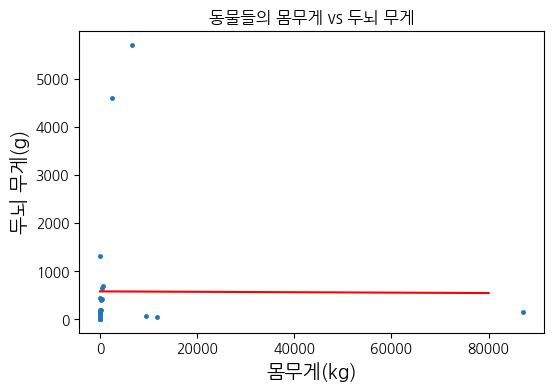

In [9]:
# 모델로 예측한 값들로 회귀 선을 그립니다(빨간색 선)
plt.plot(df.body, df.brain,linestyle='none',marker='.',markersize=5)
plt.plot(x_generated,predicted_y,markersize=5,c='red')
plt.xlabel('몸무게(kg)', fontsize=14)
plt.ylabel('두뇌 무게(g)',fontsize=14)
plt.title('동물들의 몸무게 vs 두뇌 무게')
# 뭔가 이상해보이지 않나요?
# 선형 회귀에서는 한 점이 멀리 있을 때 지렛대처럼 강하게 누르는 힘이 있습니다.

# Step 5: 레버리지 해결하기!
* 가능한 방법들:
    1. 데이터 지우기
    2. Transformation(변환)
    3. Weighted Least Squares
    4. Generalized Linear Model
    5. 그 외 다양한 Regression방식들
* 이번 강의에서는 1번과 2번을 살펴볼 것입니다! 3/4/5번은 다른 강의에서 나중에 추가로 설명해드리겠습니다.

# Step 5-1: 데이터 지우기
* 데이터 지우기는 오로지 맞는 상황에서만 사용해야합니다.
* 데이터를 그냥 막 지우는 것은 정말 위험합니다.
* 데이터를 지울 수 있는 근거는 아래가 대표적입니다:
    * 데이터 수집과정에서 오류가 있었다는 것을 알았을 때.
    * 크게 중요하지 않거나 극소수의 데이터가 멀리 있을 때. (꼭 제외한 사실을 기록해서 자신의 연구의 한계를 알 수 있게 합니다.)
    * 분포에서 특정 부분만을 설명하고 싶을 때. (이 또한 연구의 한계점에 기록되어야 합니다.)

In [27]:
# 몸무게가 1톤 보다 적고 뇌 무게가 2kg 보다 적은 동물만 저장합니다.
df_temp = df[(df.brain<2000) & (df.body<1000)]

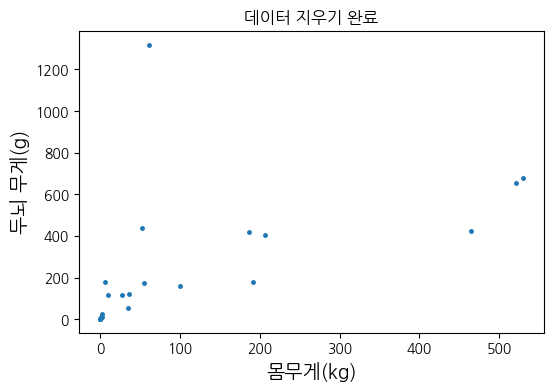

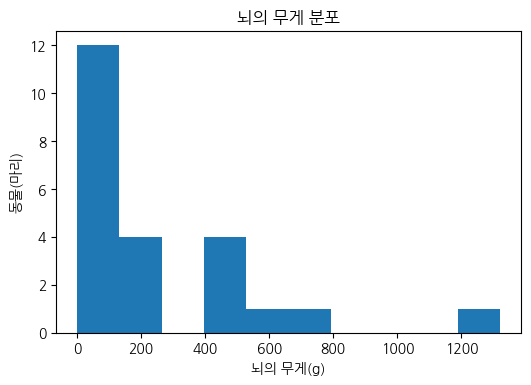

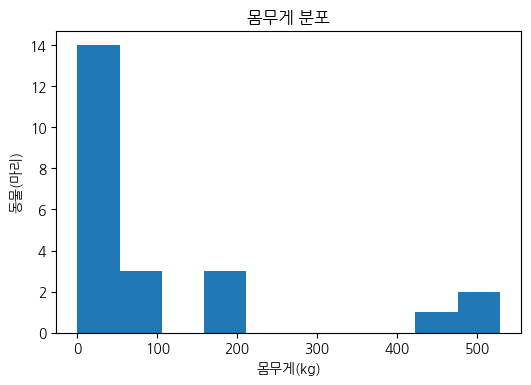

In [82]:
plt.plot(df_temp.body, df_temp.brain,linestyle='none',marker='.',markersize=5)
plt.xlabel('몸무게(kg)', fontsize=14)
plt.ylabel('두뇌 무게(g)',fontsize=14)
plt.title('데이터 지우기 완료')
plt.show()
# brain 분포
plt.hist(df_temp.brain)
plt.xlabel('뇌의 무게(g)')
plt.ylabel('동물(마리)')
plt.title('뇌의 무게 분포')
plt.show() #show를 써줘야 한 개의 셀 안에 여러개의 그래프 출력이 됩니다.
# body 분포
plt.hist(df_temp.body)
plt.xlabel('몸무게(kg)')
plt.ylabel('동물(마리)')
plt.title('몸무게 분포')
plt.show()
# 데이터로 몇개의 데이터를 지웠는데도 아직 레버리지가 강한 점들이 있습니다.
# 레버리지를 더 정확히 파악할 수 있는 지표들은 Cook's distance와 같은 것들이 있습니다만,
# 사실 지표들을 쓰기 보다는 그래프를 보고 눈으로 파악하는 것이 더 효율적이라고 생각합니다.
# 지표들도 어차피 다 상대적인 것이기에, 지표는 부가적인 도움을 줄 뿐입니다.
# 이 모델을 사용해도 되는지는 모두 연구자의 몫입니다.
# 하지만 우리의 경우에는 큰 outlier들을 지워도 아직 분포가 Right Skewed 인것으로 보입니다.
# 고로, 데이터 지우기로는 트렌드를 파악할 수 없어 보입니다.
# 만약에 우리가 추려낸 동물 데이터의 분포가 덜 비대칭적(skewed)였다면 
# 선형 회귀를 쓸 수 있었을 것입니다.

# 5-2 Transformation(변환)
* 변환은 x나 y, 혹은 둘 모두를 특정 함수로 변환시켜서 선형 회귀를 쉽게 만드는 과정입니다.
* 가장 많이 쓰이는 변환은 로그 변환(Log Transformation)입니다.
* Box-Cox Tranformation과 Square Root Transformation이 두 번째와 세 번째로 유명합니다.
* 실제 사용함에 있어서 Log Transformation 보다 Box-Cox나 Square Root이 월등히 좋은 경우는 매우 드뭅니다.
* 프로젝트에 변환을 사용하실 생각이라면 로그 변환이면 99% 충분할 것입니다.
* Box-Cox는 나중에 부록으로 다룰 예정입니다.
* 변환을 하고 예측을 한 뒤에는 꼭 역변환(Inverse Transformation)을 해주어야합니다!!!

Text(0.5, 1.0, '로그 변환 후 몸무게 vs 두뇌 무게')

C:\Users\koole\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\koole\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


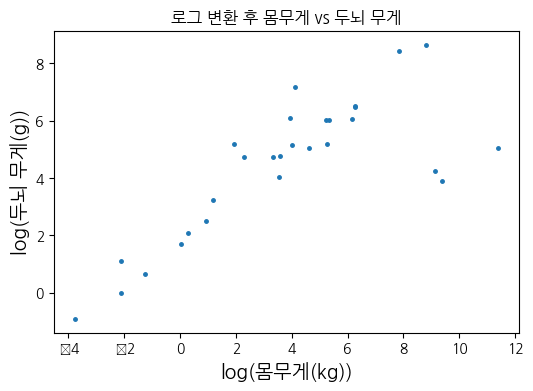

In [45]:
# 변환 방식은 간단합니다. np.log() 함수를 우리의 x/y데이터에 입히면 자동으로
# 모든 데이터가 로그 변환됩니다.
plt.plot(np.log(df.body), np.log(df.brain),linestyle='none',marker='.',markersize=5)
plt.xlabel('log(몸무게(kg))', fontsize=14)
plt.ylabel('log(두뇌 무게(g))',fontsize=14)
plt.title('로그 변환 후 몸무게 vs 두뇌 무게')
# "...RuntimeWarning: Glyph 8722..."은 
# 나눔고딕에 마이너스가 없어서 발생하는 에러로 보입니다. 
# x축을 보시면 -4와 -2가 제대로 표시 되지 않지만 
# 큰 문제는 안되기에 잠정적으로 냅두겠습니다.

# 아래 plot에서 이제는 선형 회귀하기 매우 좋은 트렌드가 되었습니다.

In [52]:
# 이제 로그 변환된 데이터에 선형 회귀를 해봅시다.
# 모델 훈련(회귀)
reg = LinearRegression().fit(np.log(df.body.values.reshape(-1,1)), np.log(df.brain))
# 모델 예측(회귀선 저장)
x_generated = np.array(list(range(-40,120)))/10
predicted_y = reg.predict(x_generated.reshape(-1,1))

Text(0.5, 1.0, '로그 변환 후 몸무게 vs 두뇌 무게')

C:\Users\koole\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\koole\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


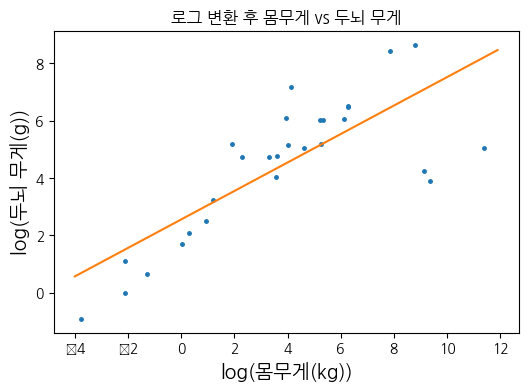

In [54]:
plt.plot(np.log(df.body), np.log(df.brain),linestyle='none',marker='.',markersize=5)
plt.plot(x_generated, predicted_y)
plt.xlabel('log(몸무게(kg))', fontsize=14)
plt.ylabel('log(두뇌 무게(g))',fontsize=14)
plt.title('로그 변환 후 몸무게 vs 두뇌 무게')
# 아직도 살짝 오른쪽 점들에 레버리지가 강해서 선이 눌립니다.
# 이정도 눌림은 연구자가 직접 정해서 어떻게 조치를 취할지 정해야합니다.
# 일단 여기서는 더 조치를 취하지 않고 역변환을 하겠습니다.

Text(0.5, 1.0, '지수 변환(역변환) 후 몸무게 vs 두뇌 무게')

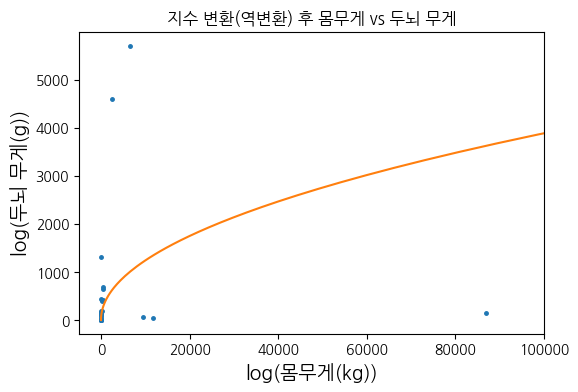

In [62]:
# 역변환 (Inverse Transformation)
# 역변환을 해주려면 log의 역함수인 지수함수를 입혀야합니다!!!
# 지수함수는 np.log()처럼 np.exp()로 입힐 수 있습니다.
plt.plot(df.body, df.brain,linestyle='none',marker='.',markersize=5)
plt.plot(np.exp(x_generated), np.exp(predicted_y)) # 역변환 시켜줍니다!!!
plt.xlabel('log(몸무게(kg))', fontsize=14)
plt.ylabel('log(두뇌 무게(g))',fontsize=14)
plt.xlim(-5000,100000)
plt.title('지수 변환(역변환) 후 몸무게 vs 두뇌 무게')
# 이제 x축과 y축이 원래 스케일대로 돌아왔습니다!!!

In [ ]:
# Squared Root Transformation을 사용할 때에는 
# 데이터에 루트를 씌우는 것이라 역변환이 제곱이나 세제곱이 됩니다.
# Box-Cox는 루트를 더 복잡하게 개조해서 사용하기에 역변환도 복잡한 식입니다.

# Step 6: 모델 평가(Model Evaluation)
* 여러 모델들을 비교하는 데에 사용되는 척도(metric)들은 꽤 다양합니다.
* 모델마다 사용할 수 있는 척도도 조금씩 바뀝니다.
* AIC, BIC, Cook's Distance, 등등과 같은 부차적인 지표들은 부록으로 나중에 올리겠습니다.
* 선형 회귀의 경우 아래의 척도(metric)들이 자주 쓰입니다.
    1. RMSE
    2. MAE
    3. R-squared
    4. R-squared-adjusted
    5. MAPE
* 이번 강의에서는 RMSE와 R-squared와 MAPE를 사용해 봅시다. 나머지 지표들도 나중에 후속강의들에서 꾸준히 다뤄질 것입니다.
* RMSE는 Root Mean Squared Error의 약자입니다. Overfit에 대한 Penalty가 큰 지표입니다.
    * $$RMSE = \sqrt{\frac{\sum_{i=1}^n(\hat{y}_i-y_i)^2}{n}}$$
* R-squared는 우리 모델이 데이터의 분산을 얼마나 잘 캡쳐하는지에 대한 지표입니다.
    * $$R^2 = 1-\frac{\sum_{i=1}^n(\hat{y}_i-y_i)^2}{\sum_{i=1}^n(\bar{y}_i-y_i)^2}$$
* MAPE(Mean Absolute Percentage Error)는 상대적 에러 지표입니다. RMSE와 MAE는 에러량을 절대량으로 비교하지만 MAPE는 상대적으로 비교합니다. 현재 우리의 데이터가 심하게 비대칭적(Right Skewed)이기 때문에, MAPE로 따지는 것은 상당히 의미가 있습니다.
    * $$MAPE = \frac{100}{n}*\sum_{i=1}^n|\frac{y-\hat{y}}{y}|$$

# Step 6-1: 두개의 모델 RMSE 비교

In [69]:
# 모델 1

# Step4에서의 원래의 레버리지 해결이 안된 모델로 RMSE 구해보기
reg = LinearRegression().fit(df.body.values.reshape(-1,1), df.brain) #원래의 값으로 모델 피팅
brain_predicted = reg.predict(df.body.values.reshape(-1,1)) # df.body값을 회귀선으로 예측
y_hat = brain_predicted # 위에 나온 RMSE 공식에서 y_hat이 곧 회귀선으로 우리가 예측한 값들입니다!
y = df.brain # 위의 RMSE 공식에서 y는 원래의 brain의 값이 되겠죠?
squared_error = (y_hat-y)**2 # 파이썬에서는 **2가 제곱입니다.
rmse_레버리지_해결_안된_모델 = np.sqrt(np.sum(squared_error)/len(squared_error))
print(rmse_레버리지_해결_안된_모델)

1310.8557437036327


In [70]:
#모델 2

# Step 5-2에서 로그 변환 후 역변환 모델로 RMSE 구해보기
reg = LinearRegression().fit(np.log(df.body.values.reshape(-1,1)), np.log(df.brain)) #변환된 값으로 모델 피팅
brain_predicted = reg.predict(np.log(df.body.values.reshape(-1,1))) # log(df.body)값을 회귀선으로 예측
y_hat = np.exp(brain_predicted) # 역변환으로 지수변환 해줍니다.
y = df.brain
squared_error = (y_hat-y)**2 
rmse_레버리지_해결_된_모델 = np.sqrt(np.sum(squared_error)/len(squared_error))
print(rmse_레버리지_해결_된_모델)

1400.8535115184798


레버리지 해결을 안한 모델이 RMSE가 더 낮습니다! RMSE는 낮을수록 좋습니다. 왜냐하면 말그대로 Error지표니까요. 우리가 고생해서 로그 변환하고 다시 역변환해서 나온 값이 그냥 쌩으로 선형 회귀한 모델보다 에러값이 더 큽니다. 그럼 모델 1이 더 나은 모델일까요? R-squared를 먼저 계산해보고 어떤 모델이 더 나은건지 다시 생각해봅시다.

# Step 6-2: 두개의 모델 R-squared비교

In [72]:
# 모델 1

# Step4에서의 원래의 레버리지 해결이 안된 모델로 R-squared 구해보기
reg = LinearRegression().fit(df.body.values.reshape(-1,1), df.brain) #원래의 값으로 모델 피팅
# 싸이킷-런 라이브러리에 r-squared는 .score() 함수로 쉽게 호출 가능합니다.
# (RMSE도 불러올 수 있긴합니다만 이번 강의에서는 그냥 손으로 했습니다.)
reg.score(df.body.values.reshape(-1,1),df.brain)

2.852801750596878e-05

In [75]:
#모델 2

# Step 5-2에서 로그 변환 후 역변환 모델로 R-squared 구해보기
reg = LinearRegression().fit(np.log(df.body.values.reshape(-1,1)), np.log(df.brain)) #변환된 값으로 모델 피팅
brain_predicted = reg.predict(np.log(df.body.values.reshape(-1,1))) # log(df.body)값을 회귀선으로 예측
# 이번에는 .score을 쓸 수 없습니다. 역변환 때문에... 다른 라이브러리 함수 호출 대신 그냥 손으로 계산해봅시다.
y_hat = np.exp(brain_predicted) # 역변환으로 지수변환 해줍니다.
y = df.brain
y_bar = np.mean(y)
윗변 = np.sum((y_hat - y)**2)
아랫변 = np.sum((y_bar - y)**2)
r_squared = 1-윗변/아랫변
r_squared

-0.14199250553889686

$$R^2 = 1-\frac{\sum_{i=1}^n(\hat{y}_i-y_i)^2}{\sum_{i=1}^n(\bar{y}_i-y_i)^2}$$
R-squared의 공식을 살펴보면 우리의 모델과 그냥 평균값으로 y를 예측하는 것 중에 어느 것이 나은지 비교하는 공식입니다.
윗변은 우리의 모델이고 아랫변은 평균값으로 y를 예측하는 모델이죠.
그렇기 때문에 2.852801750596878e-05는 아주 약간의 차이로 평균값보다 모델1이 예측하는 데에 좋은 효과를 보였다는 것입니다.
하지만 -0.14199250553889686은 음수이기 때문에 모델2가 평균값으로 예측하는 것보다 못했다는 것을 의미합니다.
엥? 그럼 RMSE와 R-squared 모두 레버리지 해결을 전혀 하지 않은 모델1이 나은건가요?
일단 지표상으로는 그렇습니다. 여기서 우리는 여러가지 시나리오를 생각해봐야합니다.

1. 우리의 데이터 수가 꽤나 적은 편입니다. 28종의 동물로 수만마리의 동물을 예측한다는 것은 무리입니다.
2. 데이터를 더 모았을 때에 모델1이 더 우수한 경우와 모델2가 더 우수한 경우 두가지를 생각해 볼 수 있습니다.
3. 만약 우리가 큰 몇 개의 값들(뇌의 무게나 몸무게가 극단적으로 큰 동물들)이 크게 상관이 없다면 모델2가 더 우수할 것입니다. 모델2는 더 작은 생물들을 잘 캡쳐해냅니다. 
4. 만약 우리가 전체적인 에러값에만 중요도를 둔다면 현재로서는 모델1이 더 우수합니다. 하지만 데이터 수를 키웠을 때의 상황은 그 누구도 모르기 때문에, 모델1과 모델2 둘다 의미가 있습니다.
5. 연구자로서 여러분은 자신의 프로젝트에 중요한 곳에 중점을 두고 모델들을 선택해야합니다. 또한, 꼭 모델을 한 개만 선택하라는 규칙도 없습니다. 각 모델의 장단점을 비교하면서, 데이터의 양이 늘어나거나 바뀌었을 때 다른 모델도 차용가능하도록 준비해두는 것이 이상적인 연구자의 자세라고 봅니다.


# Step 6-3: 두개의 모델 MAPE비교

In [80]:
# 모델 1

# Step4에서의 원래의 레버리지 해결이 안된 모델로 MAPE 구해보기
reg = LinearRegression().fit(df.body.values.reshape(-1,1), df.brain) #원래의 값으로 모델 피팅
brain_predicted = reg.predict(df.body.values.reshape(-1,1)) # df.body값을 회귀선으로 예측
y_hat = brain_predicted 
y = df.brain
mape_1 = (100/len(y))*sum(abs((y_hat-y)/y))
mape_1

10019.905277702655

In [81]:
# 모델 2

# Step 5-2에서 로그 변환 후 역변환 모델로 MAPE 구해보기
reg = LinearRegression().fit(np.log(df.body.values.reshape(-1,1)), np.log(df.brain)) #변환된 값으로 모델 피팅
brain_predicted = reg.predict(np.log(df.body.values.reshape(-1,1))) # log(df.body)값을 회귀선으로 예측
y_hat = np.exp(brain_predicted) # 역변환으로 지수변환 해줍니다.
y = df.brain
mape_1 = (100/len(y))*sum(abs((y_hat-y)/y))
mape_1

311.9608705761414

드디어 모델2가 훨씬 나은 지표가 나왔습니다. 모델1은 10019.9%의 평균에러가 있고 모델2는 311.9%의 평균에러가 있습니다. RMSE는 에러의 절대량을 검사하는 반면에 MAPE는 에러의 상대적 양을 검사합니다. RMSE에서 80000kg인 동물의 에러가 한개만 크게 틀려도 전체 에러 평균이 수십배 커지는 반면에, MAPE는 80000kg든 8kg든 에러의 상대적 비율로 평균을 내기 때문에 이런 결과가 나타나는 것입니다. 아까 위에 R-squared를 설명할 때에 "모델2는 더 작은 생물들을 잘 캡쳐해냅니다."라는 말을 했었죠? 모델2의 MAPE값이 훨씬 좋은 이유는 이 때문입니다. RMSE에서는 큰 에러값들에 작은 에러들이 묻혀서 마치 모든 점들이 예측을 잘 못하고 있는 것처럼 나타났지만, MAPE로 보면 대부분의 점들은 상대적으로 작은 에러 비율을 가지고 있어서 모델2가 상대적 에러로는 훨씬 우위에 있음을 알 수 있습니다.

# 마치며
원래 심각하게 비대칭적(Skewed)인 데이터들은 어떤 모델들로도 예측하기 힘듭니다. 하지만! 예측하기가 굉장히 어렵기 때문에 학습하기에는 최적입니다. 무슨 방법을 써도 만족스러운 결과가 나오기 힘들기 때문에, 끊임없이 여러가지 방법들을 시도해보고 모델들을 비교해보면서 실력이 급상승할 수 있는 데이터 셋 종류가 비대칭적인 데이터라고 생각합니다.

마음 같아서는 모든 내용을 줄기차게 다 넣고 싶지만, 효율성도 고려하여 일단 여기에서 마무리 짓고 빼먹은 내용들은 천천히 부록이나 다른 강의들에서 채워나가려고 합니다. 고생하셨습니다.